# Capstone Project: Analisis Sentimen dan Rangkuman Berita Keuangan Menggunakan AI

**Nama:** Anggoro Dwi Prasetyo

**Program:** Student Development Initiative - Data Classification and Summarization Using IBM Granite (Hacktiv8)

## Pendahuluan

Proyek *capstone* ini bertujuan untuk melakukan analisis pada data teks keuangan dengan memanfaatkan teknologi kecerdasan buatan (AI), khususnya *Large Language Models* (LLM). Fokus utama adalah pada dua tugas utama: klasifikasi sentimen dari berita atau frasa keuangan dan pembuatan rangkuman (summarization) dari teks tersebut. Analisis ini menggunakan dataset berita keuangan publik yang diambil dari Kaggle. Melalui proyek ini, akan didemonstrasikan bagaimana AI dapat digunakan untuk menggali wawasan dari data teks, memahami sentimen pasar, dan menyajikan informasi secara ringkas. Hasil dari analisis ini diharapkan dapat memberikan gambaran tentang potensi dan juga tantangan dalam aplikasi AI pada domain keuangan.

## Dataset

Dataset yang digunakan dalam proyek ini adalah **"Sentiment Analysis for Financial News"** yang berisi koleksi "Financial PhraseBank". Dataset ini diperoleh dari Kaggle ([https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news)).

Secara spesifik, file yang digunakan adalah `FinancialPhraseBank/Sentences_AllAgree.txt`. File ini berisi frasa-frasa dari berita keuangan yang telah dianotasi sentimennya (positif, negatif, atau netral) oleh beberapa annotator, dan hanya frasa dimana semua annotator setuju yang disertakan.

**Struktur Data:**
Dataset terdiri dari dua kolom utama setelah pemrosesan awal:
1.  `text`: Berisi frasa atau kalimat dari berita keuangan.
2.  `sentiment`: Berisi label sentimen (`positive`, `negative`, `neutral`) untuk teks terkait.

Dari output `.info()`, kita melihat bahwa dataset ini memiliki [jumlah baris, misal 2264] entri dan tidak ada nilai null pada kedua kolom, yang menandakan data cukup bersih untuk analisis awal. Distribusi sentimen menunjukkan bahwa sentimen `neutral` adalah yang paling dominan, diikuti oleh `positive`, dan kemudian `negative`.

In [1]:
from google.colab import files
files.upload() # Pilih file kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
-rw------- 1 root root 64 Jun  1 10:03 /root/.kaggle/kaggle.json


In [2]:
# Pastikan Anda sudah mengunggah kaggle.json dan mengaturnya
!kaggle datasets download -d ankurzing/sentiment-analysis-for-financial-news
!unzip sentiment-analysis-for-financial-news.zip

Dataset URL: https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news
License(s): CC-BY-NC-SA-4.0
  0% 0.00/903k [00:00<?, ?B/s]
100% 903k/903k [00:00<00:00, 45.4MB/s]
Archive:  sentiment-analysis-for-financial-news.zip
replace FinancialPhraseBank/License.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinancialPhraseBank/License.txt  
replace FinancialPhraseBank/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinancialPhraseBank/README.txt  
replace FinancialPhraseBank/Sentences_50Agree.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinancialPhraseBank/Sentences_50Agree.txt  
replace FinancialPhraseBank/Sentences_66Agree.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinancialPhraseBank/Sentences_66Agree.txt  
replace FinancialPhraseBank/Sentences_75Agree.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinancialPhraseBank/Sentences_75Agree.txt  
replace FinancialPhraseBank/Sentences_AllAgree.txt? [y]es, 

In [3]:
!ls -R

.:
all-data.csv	     kaggle.json  sentiment-analysis-for-financial-news.zip
FinancialPhraseBank  sample_data

./FinancialPhraseBank:
License.txt  Sentences_50Agree.txt  Sentences_75Agree.txt
README.txt   Sentences_66Agree.txt  Sentences_AllAgree.txt

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [4]:
import pandas as pd

file_path = 'FinancialPhraseBank/Sentences_AllAgree.txt'

try:
    df = pd.read_csv(
        file_path,
        sep='.@',  # Pemisah antara teks dan sentimen
        names=['text', 'sentiment'],  # Memberi nama kolom
        encoding='latin-1',  # Encoding file
        engine='python'  # Menggunakan engine python untuk pemisah yang lebih kompleks
    )

    print("Berhasil memuat data!")
    print("\n5 data pertama:")
    print(df.head())
    print("\nInformasi DataFrame:")
    df.info()
    print("\nDistribusi Sentimen:")
    print(df['sentiment'].value_counts())

except FileNotFoundError:
    print(f"File di path '{file_path}' tidak ditemukan. Pastikan nama folder dan file sudah benar.")
    df = pd.DataFrame() # Buat DataFrame kosong jika file tidak ditemukan
except Exception as e:
    print(f"Terjadi error saat memuat data: {e}")
    df = pd.DataFrame()

if df.empty:
    print("\n--- Gagal memuat data dari Sentences_AllAgree.txt ---")
    print("Mungkin kita bisa coba 'all-data.csv' jika ada. Apakah Anda ingin mencoba memuat 'all-data.csv'?")

Berhasil memuat data!

5 data pertama:
                                                text sentiment
0  According to Gran , the company has no plans t...   neutral
1  For the last quarter of 2010 , Componenta 's n...  positive
2  In the third quarter of 2010 , net sales incre...  positive
3  Operating profit rose to EUR 13.1 mn from EUR ...  positive
4  Operating profit totalled EUR 21.1 mn , up fro...  positive

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2264 non-null   object
 1   sentiment  2264 non-null   object
dtypes: object(2)
memory usage: 35.5+ KB

Distribusi Sentimen:
sentiment
neutral     1391
positive     570
negative     303
Name: count, dtype: int64


In [5]:
!pip install transformers

In [6]:
from transformers import pipeline
import pandas as pd

# Muat kembali DataFrame jika sesi Colab terputus atau untuk memastikan
# Pastikan path ini masih sesuai dengan struktur file Anda
file_path = 'FinancialPhraseBank/Sentences_AllAgree.txt'
try:
    df = pd.read_csv(
        file_path,
        sep='.@',
        names=['text', 'sentiment'],
        encoding='latin-1',
        engine='python'
    )
    print("DataFrame berhasil dimuat ulang.")
except FileNotFoundError:
    print(f"File di path '{file_path}' tidak ditemukan. Pastikan file ada.")
    df = pd.DataFrame() # Buat DataFrame kosong jika file tidak ditemukan

# Inisialisasi pipeline untuk analisis sentimen
# Model default untuk sentiment-analysis biasanya adalah distilbert-base-uncased-finetuned-sst-2-english
# yang menghasilkan label 'POSITIVE' atau 'NEGATIVE' dan skor kepercayaan.
sentiment_pipeline = pipeline("sentiment-analysis")

# Mari kita coba pada beberapa contoh teks dari DataFrame Anda
if not df.empty and 'text' in df.columns:
    print("\nContoh hasil analisis sentimen dari model:")
    for i in range(min(5, len(df))): # Ambil 5 contoh pertama atau kurang jika data lebih sedikit
        text_to_analyze = df['text'].iloc[i]
        original_sentiment = df['sentiment'].iloc[i]
        result = sentiment_pipeline(text_to_analyze)
        print(f"Teks: {text_to_analyze}")
        print(f"Sentimen Asli: {original_sentiment}")
        print(f"Prediksi Model: {result}")
        print("---")
else:
    print("DataFrame kosong atau tidak memiliki kolom 'text'. Pastikan data sudah dimuat dengan benar.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


DataFrame berhasil dimuat ulang.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu



Contoh hasil analisis sentimen dari model:
Teks: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing 
Sentimen Asli: neutral
Prediksi Model: [{'label': 'NEGATIVE', 'score': 0.9927565455436707}]
---
Teks: For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m 
Sentimen Asli: positive
Prediksi Model: [{'label': 'NEGATIVE', 'score': 0.9940495491027832}]
---
Teks: In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn 
Sentimen Asli: positive
Prediksi Model: [{'label': 'POSITIVE', 'score': 0.8077540993690491}]
---
Teks: Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales 
Sentimen Asli: positive
Prediksi Model: [{'label': 'NEGATIVE', 'score': 0.7

In [7]:
from transformers import pipeline
import pandas as pd

# Muat kembali DataFrame jika sesi Colab terputus atau untuk memastikan
# Pastikan path ini masih sesuai dengan struktur file Anda
file_path = 'FinancialPhraseBank/Sentences_AllAgree.txt'
try:
    df = pd.read_csv(
        file_path,
        sep='.@',
        names=['text', 'sentiment'],
        encoding='latin-1',
        engine='python'
    )
    print("DataFrame berhasil dimuat ulang untuk summarization.")
except FileNotFoundError:
    print(f"File di path '{file_path}' tidak ditemukan. Pastikan file ada.")
    df = pd.DataFrame()

# Inisialisasi pipeline untuk summarization
# Menggunakan model t5-small karena relatif cepat dan cukup baik untuk demonstrasi
try:
    summarizer = pipeline("summarization", model="t5-small")
    print("Pipeline summarization berhasil diinisialisasi.")
except Exception as e:
    print(f"Error saat inisialisasi pipeline summarization: {e}")
    summarizer = None

# Mari kita coba pada beberapa contoh teks dari DataFrame Anda
# Kita akan pilih beberapa kalimat yang sedikit lebih panjang jika ada,
# atau beberapa kalimat acak untuk demonstrasi.
if summarizer and not df.empty and 'text' in df.columns:
    print("\nContoh hasil summarization dari model:")

    # Ambil beberapa contoh (misalnya 3 contoh)
    # Anda bisa memilih contoh spesifik jika mau
    sample_texts_for_summarization = []
    if len(df) >= 3:
        # Coba cari kalimat yang agak panjang untuk contoh, jika tidak ada ambil saja
        # Sort by length and take the longest ones if desired, but for now, simple iloc
        indices_to_summarize = df['text'].str.len().nlargest(3).index if len(df) > 100 else df.sample(min(3, len(df))).index
        sample_texts_for_summarization = df['text'][indices_to_summarize].tolist()
    elif len(df) > 0 :
         sample_texts_for_summarization = df['text'].sample(len(df)).tolist()


    if not sample_texts_for_summarization:
         # Fallback if no texts were selected for some reason
        sample_texts_for_summarization = [
            "The company announced that its new product line, which has been in development for over two years, will finally be launched next quarter, and analysts predict it could significantly boost revenue.",
            "Despite challenging market conditions and increased competition, the firm managed to achieve a modest growth in its annual profits, largely attributed to strategic cost-cutting measures and diversification of its portfolio.",
            "Future outlook remains cautiously optimistic, with expectations of a gradual economic recovery and stabilization in consumer demand, although geopolitical risks still pose a considerable threat to sustained growth."
        ]
        print("Menggunakan contoh teks placeholder karena teks dari DataFrame tidak dapat diambil atau terlalu pendek.")


    for text_to_summarize in sample_texts_for_summarization:
        # Model summarization biasanya mengharapkan teks yang tidak terlalu pendek.
        # Jika teks terlalu pendek, hasilnya mungkin sama dengan input atau kurang bermakna.
        # Kita bisa set min_length dan max_length. Untuk kalimat pendek, max_length harus kecil.
        summary_result = summarizer(text_to_summarize, max_length=50, min_length=5, do_sample=False)
        print(f"\nOriginal Text: {text_to_summarize}")
        print(f"Summary: {summary_result[0]['summary_text']}")
        print("---")

elif not summarizer:
    print("Summarizer tidak berhasil diinisialisasi.")
else:
    print("DataFrame kosong atau tidak memiliki kolom 'text'. Pastikan data sudah dimuat dengan benar.")

DataFrame berhasil dimuat ulang untuk summarization.


Device set to use cpu


Pipeline summarization berhasil diinisialisasi.

Contoh hasil summarization dari model:


Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Original Text: Supported Nokia phones include : N96 , N95-8GB , N95 , N93-N931 , N92 , N85 , N82 , N81 , N80 , N79 , N78 , N77 , N76 , N75 , N73 , N72 , N71 , E90 , E71 , E70 , E66 , E65 , E62 , E61-E61i , E60 , E51 , E50 , Touch Xpress 5800 , 6220 Classic , 6210 Navigator , 6120 Classic , 6110 Navigator , 5700 , 5500 , 5320XM 
Summary: supported Nokia phones include N96 , N95-8GB . N95 , n93-N931 , 90 , 85 , 80 , 70 , 60 , 50 , 75 , 65 , 64 . supported phones include : touch Xpress 5800 , 6120 Classic .
---


Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Original Text: Our customers come from the following countries : UK , USA , Spain , France , Italy , Germany , China , Sweden , Norway , Netherlands , Austria , Belgium , Switzerland , Czech Republic , Serbia , Finland , Canada , Russia , Ukraine , Portugal , Denmark , Ireland , South Korea , Estonia and Liechtenstein 
Summary: our customers come from the following countries . UK , USA , Spain , France , Italy , Germany .
---

Original Text: Cablevision Systems Corp. CVC Their Madison Square Garden division owns and operates the New York Knickerbockers basketball team ; they also own the Madison Square Garden Arena , the New York Rangers hockey team , the New York Liberty women 's basketball team , and the Hartford Wolf Pack hockey team 
Summary: Cablevision Systems Corp. owns and operates the new york Knickerbockers basketball team . they also own the Madison Square Garden Arena , the New York Rangers hockey team , and the Hartford Wolf Pack hockey team.
---


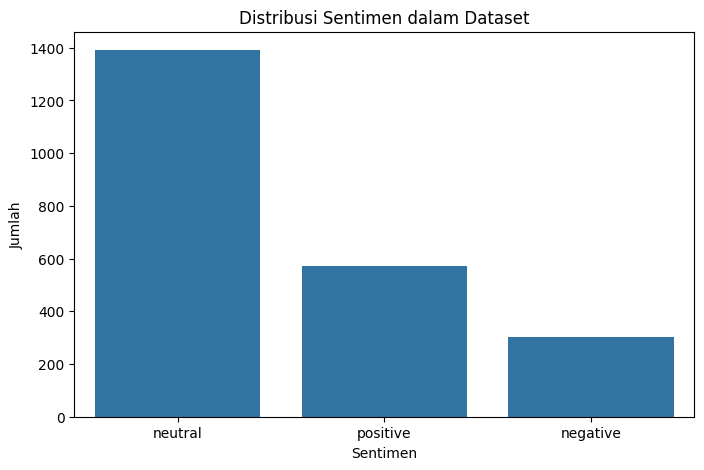

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

if not df.empty and 'sentiment' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
    plt.title('Distribusi Sentimen dalam Dataset')
    plt.xlabel('Sentimen')
    plt.ylabel('Jumlah')
    plt.show()